In [1]:
# 1.
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cardio = pd.read_csv("../Data/cardio_train.csv", sep=";")
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# 1.1 EDA
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
# EDA
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


cardio
0    35021
1    34979
Name: count, dtype: int64


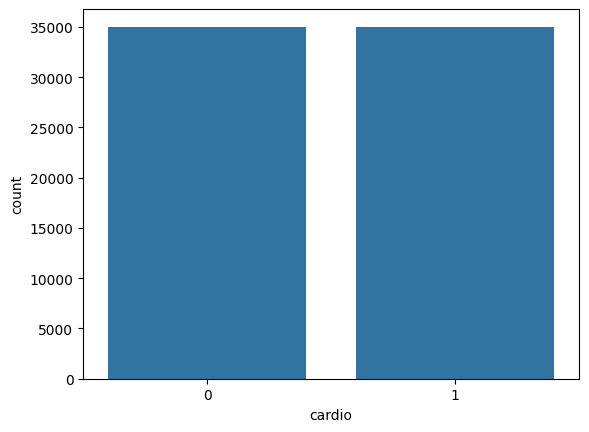

In [ ]:
# 1.1 a) Hjärtkärlsjukdom
# 1 = sjuk, 0 = frisk
print(cardio["cardio"].value_counts())

# plot Hjärtkärlsjukdom
sns.countplot(x="cardio", data=cardio)

# Plota interalktivt med plotLy
# fig = px.line(cardio, x="cardio", title="Hjärtkärlsjukdom")
# fig.show()
# fig = px.histogram(cardio, x="cardio", title="Hjärtkärlsjukdom")
# fig.show()


<Axes: xlabel='cardio', ylabel='count'>

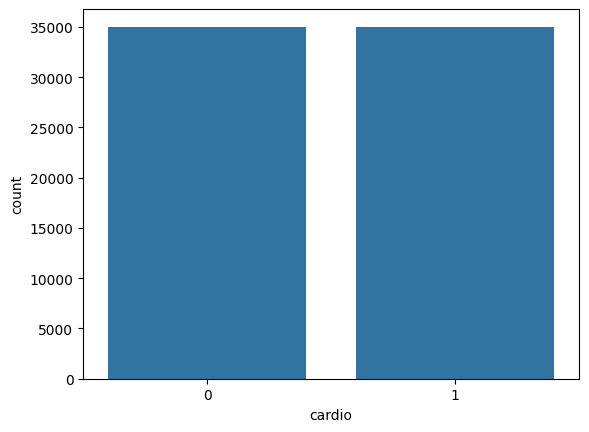

In [5]:
# plot Hjärtkärlsjukdom
sns.countplot(x="cardio", data=cardio)

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64


<Axes: xlabel='cholesterol', ylabel='count'>

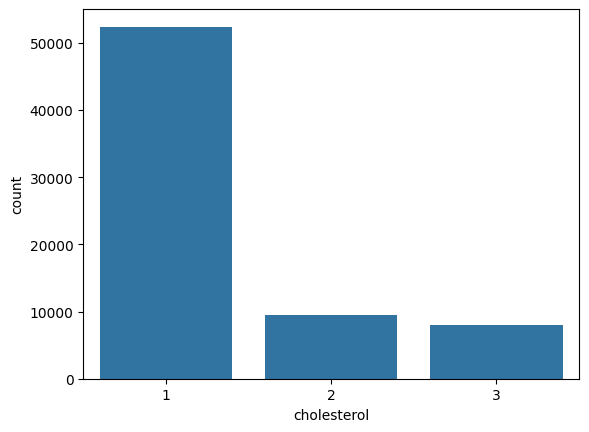

In [6]:
# 1.1 b) Kolestrolvärden
# 1 = normal, 2 = över normal, 3 = långt över normal
print(cardio["cholesterol"].value_counts())

# plot kolesterolvärden
sns.countplot(x="cholesterol", data=cardio)

In [7]:
# 1.1 c) Åldersfördelning
# Ålder i dagar
cardio["age"].describe()

# Ålder i år
cardio["age"] = cardio["age"] / 365
cardio["age"]


0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

smoke
0    63831
1     6169
Name: count, dtype: int64


<Axes: xlabel='smoke', ylabel='count'>

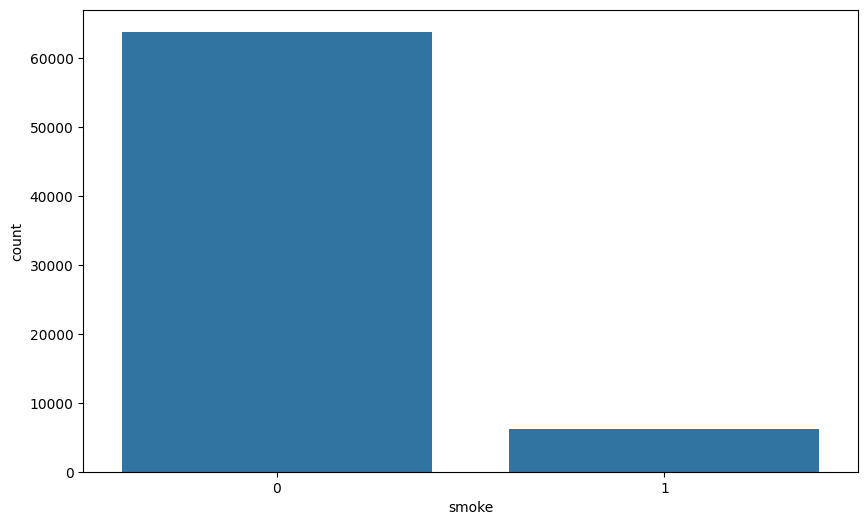

In [8]:
# 1.1 d) Andel rökare
# 1 = rökare, 0 = icke-rökare
print(cardio["smoke"].value_counts())
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="smoke", data=cardio)

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


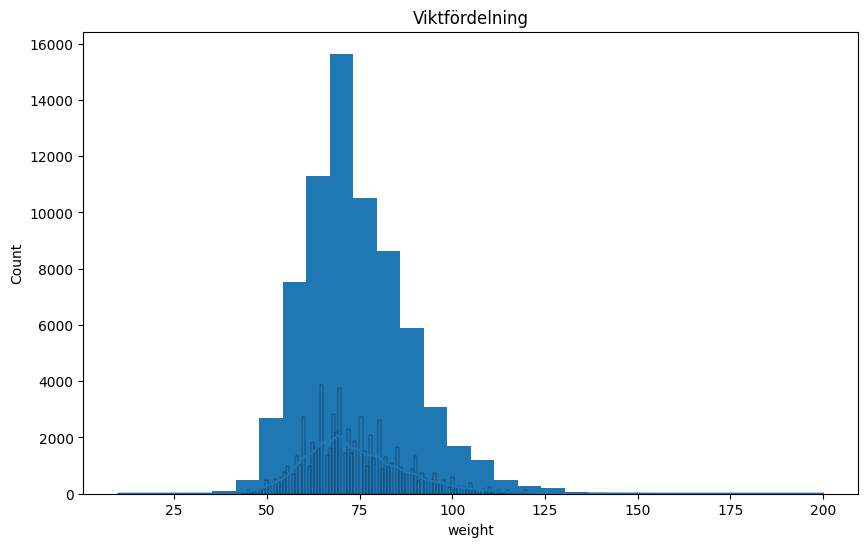

In [9]:
# 1.1 e) Viktfördelning
# Vikt i kg
print(cardio["weight"].describe())

# Viktfördelning plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cardio["weight"], bins=30)
sns.histplot(cardio["weight"], kde=True)
plt.title("Viktfördelning")
plt.show()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


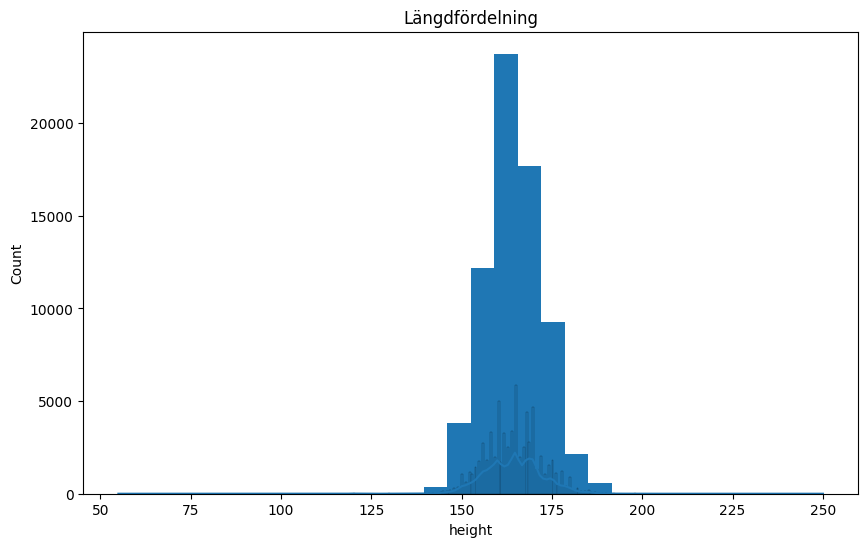

In [10]:
# 1.1 f) Längdfördelning
# Längd i cm
print(cardio["height"].describe())

# Längdfördelning plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cardio["height"], bins=30)
sns.histplot(cardio["height"], kde=True)
plt.title("Längdfördelning")
plt.show()

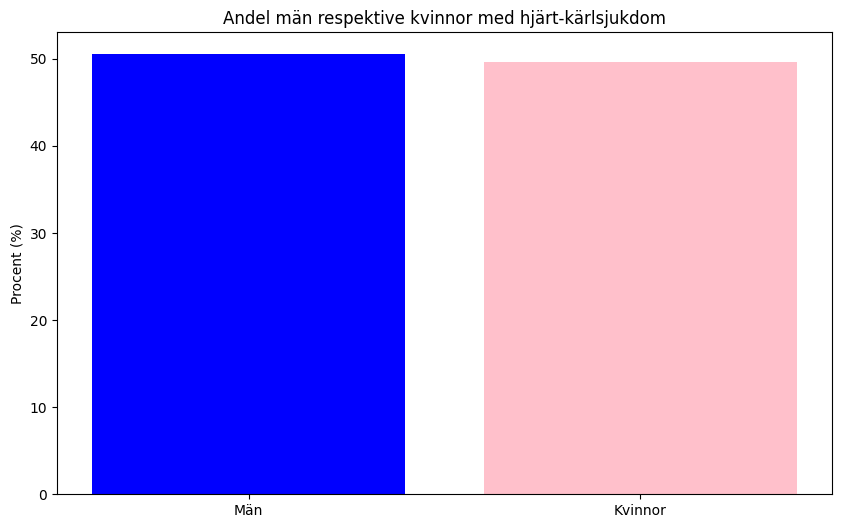

Andel män med hjärt-kärlsjukdom: 50.52%
Andel kvinnor med hjärt-kärlsjukdom: 49.67%


In [11]:
# 1.1 g) Andel kvinnor reserpektive män med hjärtkärlsjukdom
# Plot andel kvinnor respektive män med hjärtkärlsjukdom
fig, ax = plt.subplots(figsize=(10, 6))

# Skapa en DataFrame från det givna datasetet
df = pd.DataFrame(cardio)

# Beräkna antalet män och kvinnor med hjärt-kärlsjukdom
num_men_with_cardio = df[(df['gender'] == 2) & (df['cardio'] == 1)].shape[0]
num_women_with_cardio = df[(df['gender'] == 1) & (df['cardio'] == 1)].shape[0]

# Beräkna totalt antal män och kvinnor
total_men = df[df['gender'] == 2].shape[0]
total_women = df[df['gender'] == 1].shape[0]

# Beräkna andel män och kvinnor med hjärt-kärlsjukdom
men_percentage = (num_men_with_cardio / total_men) * 100
women_percentage = (num_women_with_cardio / total_women) * 100

# Plot resultaten    
labels = ['Män', 'Kvinnor']
percentages = [men_percentage, women_percentage]
ax.bar(labels, percentages, color=['blue', 'pink'])
plt.title("Andel män respektive kvinnor med hjärt-kärlsjukdom")
plt.ylabel("Procent (%)")
plt.show()

print(f"Andel män med hjärt-kärlsjukdom: {men_percentage:.2f}%")
print(f"Andel kvinnor med hjärt-kärlsjukdom: {women_percentage:.2f}%")

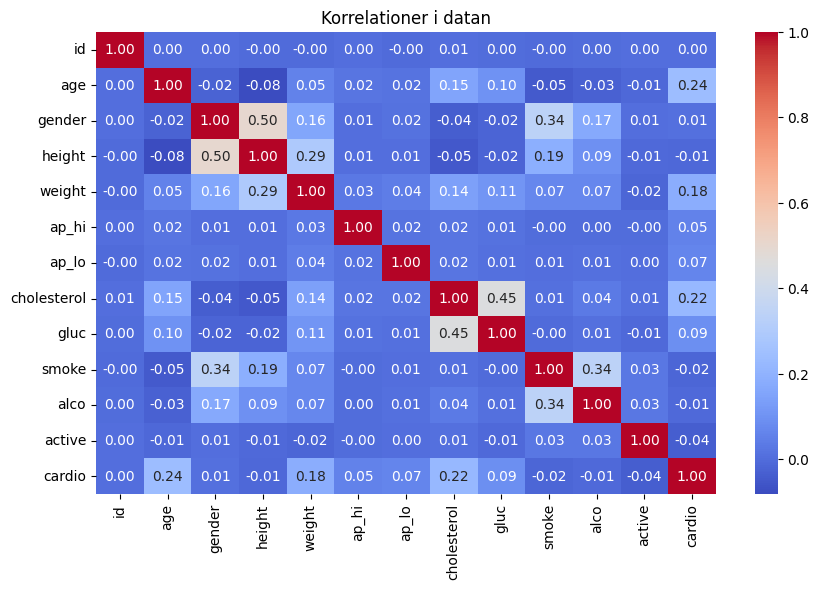

In [12]:
# 1.2 Modelldesign
# Skapa heatmap av korrleationen i datan
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cardio.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationer i datan")
plt.show()

För att ta bort prover med orealistiska BMI och avvikare(outliers) kan man definera ett rimligt intervall för BMI-värden baserat på medicinska riktlinjer eller statistisk analys. Ett generellt tillvägagångssätt för att bestämma gränserna är:

* Medicinska riktlinjer: Världshälsoorganisationen (WHO) definierar följande riktlinjer:


* **BMI:**
- Undernärning: < 18.5
- Normalvikt: 18.5–24.9
- Pre-obesitet: 25.0-29.9
- Obisitet klass 1: 30.0-34.9
- Obisitet klass 2: 35.0-39.9
- Obisitet klass 3: > 40.0

För att säkerställa att dom insamlade proverna är representativa och användbara för analysen eliminerades data som ligger utanför riktlinjerna. Genom att göra detta förbättrades kvaliteten och tillförlitligheten hos den data som används i analys och slutsatser. Att följa dessa riktlinjer har hjälpt till att säkerställa att resultatet är vetenskapligt giltligt och användbart.


* https://sv.wikipedia.org/wiki/BMI_(kroppsmasseindex)
* https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations
* https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index
* https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

### 1.2.1 Skapa en BMI-feature

In [13]:
# 1.2.1 Skapa en BMI-feature
# BMI = vikt / längd^2
cardio["bmi"] = cardio["weight"] / (cardio["height"] / 100) ** 2

# a) Släng samples med orimliga BMI-värden och outliers
# Släng samples med orimliga BMI-värden
cardio = cardio[(cardio["bmi"] > 10) & (cardio["bmi"] < 100)]


# 1.2.1 b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III).
# BMI-kategorier
bmi_bins = [18.5, 24.9, 30.0, 34.9, 39.9, 40]
bmi_labels = ["Underweight", "Normal weight", "Overweight", "Obese (Class I)", "Obese (Class II)", "Obese (Class III)"]




In [14]:
# 1.2.1 c) 
# Skapa en DataFrame (ersätt med befintlig DataFrame)
cardio_bmi = pd.DataFrame({
    "bmi" : [19, 22, 27, 30, 33, 36, 39] # exempel på BMI-värden
})

# Definera gränserna för BMI-kategorierna
bmi_bins = [-float("inf"), 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")]

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [15]:
print(cardio.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')


### 1.2.1 Skapa en feature för blodtryckskategorier enligt tabellen i denna artikel.

In [16]:
# 1.2.1 Skapa en feature för blodtryckskategorier enligt tabellen i denna artikel.
# Blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1

# a) Släng bort samples med orimliga blodtryck och outliers. Likt förra uppgiften är det inte trivialt att sätta gränserna. Beskriv hur du kommer fram till gränserna.
# Filtrera bort orimliga blodtrycksvärden
cardio = cardio[(cardio["ap_lo"] >= 60) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] >= 90) & (cardio["ap_hi"] <= 250)]

# b) Skapa en kategorisk feature med relevanta kategorier.
# Blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2
cardio.loc[(cardio["ap_lo"] > 80) & (cardio["ap_lo"] <= 90) & (cardio["ap_hi"] > 120) & (cardio["ap_hi"] <= 140), "blood_pressure"] = 3
cardio.loc[(cardio["ap_lo"] > 90) & (cardio["ap_lo"] <= 100) & (cardio["ap_hi"] > 140) & (cardio["ap_hi"] <= 160), "blood_pressure"] = 4
cardio.loc[(cardio["ap_lo"] > 100) & (cardio["ap_lo"] <= 120) & (cardio["ap_hi"] > 160) & (cardio["ap_hi"] <= 180), "blood_pressure"] = 5
cardio.loc[(cardio["ap_lo"] > 120) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] > 180) & (cardio["ap_hi"] <= 250), "blood_pressure"] = 6

#c) Undersök om den nya kategorin är relevant, dvs har den någon nyttig korrelation? Uppdatera data-analysen om du hittar något intressant.
# Skapa en kategorisk feature för blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2

# Printa korrelationen mellan den nya featuren och target-variabeln
print(cardio[["blood_pressure", "cardio"]].corr())

                blood_pressure    cardio
blood_pressure        1.000000 -0.377854
cardio               -0.377854  1.000000


In [17]:
cardio_copy2 = cardio.copy()
# Ta bort kolumnerna från DataFrame
columns_to_drop = ["blood_pressure", "height", "weight"]
cardio_copy2.drop(columns=columns_to_drop, inplace=True)

# Gör one-hot encoding på kön
cardio_copy2 = pd.get_dummies(cardio_copy2, columns=["gender"], drop_first=True)

print(cardio_copy2)

          id        age  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0          0  50.391781    110     80            1     1      0     0       1   
1          1  55.419178    140     90            3     1      0     0       1   
2          2  51.663014    130     70            3     1      0     0       0   
3          3  48.282192    150    100            1     1      0     0       1   
4          4  47.873973    100     60            1     1      0     0       0   
...      ...        ...    ...    ...          ...   ...    ...   ...     ...   
69995  99993  52.712329    120     80            1     1      1     0       1   
69996  99995  61.920548    140     90            2     2      0     0       1   
69997  99996  52.235616    180     90            3     1      0     1       0   
69998  99998  61.454795    135     80            1     2      0     0       0   
69999  99999  56.273973    120     80            2     1      0     0       1   

       cardio        bmi  g

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = cardio.drop(columns=["cardio"], axis=1)
y = cardio["cardio"]

# Välj en mindre del av datasetet för snabbare körning
X_sample = X.sample(frac=0.3, random_state=42)
y_sample = y.loc[X_sample.index]

# Dela upp datan i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Definiera pipeline
pipe_svm = Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])

# Definiera parametrar som ska optimeras 
param_grid_svm = {
    'SVM__C': [1, 10],
    'SVM__gamma': [1, 0.1],
    'SVM__kernel': ['rbf', 'linear']
}

# Använd GridSearchCV för att optimera hyperparametrar
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)
print("Best accuracy for SVM:", grid_svm.best_score_)


Best parameters for SVM: {'SVM__C': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
Best accuracy for SVM: 0.7150900138946747


### 1.2.3 Utförande

In [ ]:
# 1.2.3 Utförande
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# välj tre eller fler algoritmer. För vare agoritm:
# a) Använd GridSearchCV för att skala hyperparameteroptimisera varje algoritm

X = cardio.drop(columns=["cardio"], axis=1)
y = cardio["cardio"]

# Dela upp datan i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definiera pipeline
pipe_svm = Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])

# Definiera parametrar som ska optimeras
param_grid_svm = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__gamma': [1, 0.1, 0.01, 0.001],
    'SVM__kernel': ['rbf', 'linear']
}

# Använd GridSearchCV för att optimera hyperparametrar
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)
print("Best accuracy for SVM:", grid_svm.best_score_)


In [ ]:
# 1.2.3 b) Utvärdera resulterande modell
# Skapa en modell för varje algoritm och utvärdera modellen med hjälp av valideringsdata
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediktions på tetdata
y_pred_svm = grid_svm.predict(X_test)

# Beräkna accuracy
accuracy= accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_rep = classification_report(y_test, y_pred_svm)

print("Accuracy for SVM:", accuracy)
print("Confusion matrix for SVM: \n", conf_matrix)
print("Classification report for SVM: \n", class_rep)

### 1.3 Packetering & Demo 

In [25]:
### 1.3 Packetering & Demo 
import joblib
# from sklearn.externals import joblib
import pandas as pd
# 1.3.1 Spara modell
# plocka ut 100 slumpmässigt valda rader från datan
X_sample = X.sample(n=100, random_state=42)

# Exportera data till test_sample.csv
X_sample.to_csv("../Data/test_sample.csv", index=False)

# Separera ut de 100 slumpmässiga raderna från resten av datasetet
cardio = cardio.drop(X_sample.index)

# Dela upp datan i tränings- och testdata
X = cardio.drop(columns=["cardio"], axis=1)
y = cardio["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definiera pipeline för SVM-modellen
pipe_svm = Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])

# Definiera parametrar som ska optimeras
param_grid_svm = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__gamma': [1, 0.1, 0.01, 0.001],
    'SVM__kernel': ['rbf', 'linear']
}

# Använd GridSearchCV för att optimera hyperparametrar
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Skapa en tränad modell på hela datasetet utan de 100 slumpmässiga raderna
final_model = grid_svm.best_estimator_
final_model.fit(X, y)

# Spara den tränade modellen i en .pkl-fil med komprimering
joblib.dump(final_model, 'final_model.pkl', compress=True)

### 1.3.2 Ladda modellen

In [ ]:
import pandas as pd
from sklearn.externals import joblib

# Ladda in test samples
test_samples = pd.read_csv("test_samples.csv")

# Ladda in den tränade modellen
model = joblib.load('final_model.pkl')

# Göra förutsägelser på testdatan
predictions = model.predict(test_samples)

# Beräkna sannolikhet för varje klass
probabilities = model.predict_proba(test_samples)

# Skapa en DataFrame med resultaten
results = pd.DataFrame({
    'probability class 0': probabilities[:, 0],
    'probability class 1': probabilities[:, 1],
    'prediction': predictions
})

# Exportera resultaten till en CSV-fil
results.to_csv('predictions.csv', index=False)
